In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

In [2]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = '~/datasets'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

# create train and test dataloaders
batch_size = 128
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device is mps
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

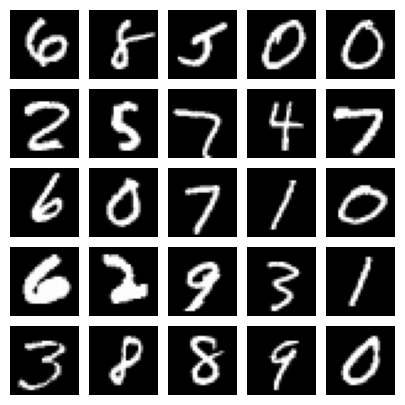

In [3]:
# get 25 sample training images for visualization
dataiter = iter(train_loader)
image = next(dataiter)

num_samples = 25
sample_images = [image[0][i,0] for i in range(num_samples)] 

fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

In [4]:
from vae import VAE2, loss_function
from torch.optim import Adam

model = VAE2().to(device)
optimizer = Adam(model.parameters(), lr=1e-3)

def train(model, optimizer, epochs, x_dim, train_loader, device):
    model.train()
    for epoch in range(epochs):
        overall_loss = 0
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(-1, x_dim).to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss = loss_function(x, x_hat, mean, log_var)
            
            overall_loss += loss.item()
            
            loss.backward()
            optimizer.step()

        print("\tEpoch", epoch + 1, "\tAverage Loss: ", overall_loss/(batch_idx*batch_size))
    return overall_loss


In [5]:
train(model, optimizer, epochs=50, x_dim=784, train_loader=train_loader, device=device)

	Epoch 1 	Average Loss:  167.65004575354422
	Epoch 2 	Average Loss:  131.30398321559287
	Epoch 3 	Average Loss:  126.64387939322708
	Epoch 4 	Average Loss:  123.98199427025949
	Epoch 5 	Average Loss:  122.14317100068443
	Epoch 6 	Average Loss:  120.80386023236136
	Epoch 7 	Average Loss:  119.7093084449442
	Epoch 8 	Average Loss:  118.84992402231592
	Epoch 9 	Average Loss:  118.0491287850926
	Epoch 10 	Average Loss:  117.30452434833234
	Epoch 11 	Average Loss:  116.72004704597668
	Epoch 12 	Average Loss:  116.07344439905933
	Epoch 13 	Average Loss:  115.53625457307213
	Epoch 14 	Average Loss:  115.0222827389709
	Epoch 15 	Average Loss:  114.52335688599155
	Epoch 16 	Average Loss:  114.08838647043603
	Epoch 17 	Average Loss:  113.57218246786003
	Epoch 18 	Average Loss:  113.2154835595025
	Epoch 19 	Average Loss:  112.86401259593474
	Epoch 20 	Average Loss:  112.55026869488577
	Epoch 21 	Average Loss:  112.15777949797801
	Epoch 22 	Average Loss:  111.85470639742337
	Epoch 23 	Average Loss

6420314.10546875